In [50]:
!nvidia-smi

Wed Nov 24 08:17:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |   4361MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [51]:
!wget https://raw.githubusercontent.com/raunakbhupal/tensorflow_codes/main/extras/helper_functions.py

--2021-11-24 08:17:58--  https://raw.githubusercontent.com/raunakbhupal/tensorflow_codes/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10234 (10.0K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   9.99K  --.-KB/s    in 0s      

2021-11-24 08:17:58 (41.2 MB/s) - ‘helper_functions.py.1’ saved [10234/10234]



In [52]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [53]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2021-11-24 08:17:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   134MB/s    in 1.2s    

2021-11-24 08:17:59 (134 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [54]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/gr

In [55]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [56]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32

train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode='categorical',
                                                                          batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [57]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [58]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [59]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x=base_model(inputs)
print(f'Shape after base model: {x.shape}')

x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after global average: {x.shape}')

outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_0=tf.keras.Model(inputs,outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_10_percent=model_0.fit(train_data_10_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_10_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25*len(test_data)),
                               callbacks=[create_tensorboard_callback('transfer_learning','10_percent_feature_extraction')])

Shape after base model: (None, 7, 7, 1280)
Shape after global average: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20211124-081805
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 16s 335ms/step - loss: 1.8975 - accuracy: 0.4120 - val_loss: 1.3214 - val_accuracy: 0.7253
Epoch 2/5
24/24 [==============================] - 7s 263ms/step - loss: 1.1605 - accuracy: 0.7493 - val_loss: 0.9023 - val_accuracy: 0.8092
Epoch 3/5
24/24 [==============================] - 9s 357ms/step - loss: 0.8427 - accuracy: 0.8173 - val_loss: 0.7195 - val_accuracy: 0.8372
Epoch 4/5
24/24 [==============================] - 7s 270ms/step - loss: 0.6811 - accuracy: 0.8560 - val_loss: 0.6364 - val_accuracy: 0.8586
Epoch 5/5
24/24 [==============================] - 9s 357ms/step - loss: 0.5958 - accuracy: 0.8760 - val_loss: 0.5690 - val_accuracy: 0.8635


In [60]:
model_0.evaluate(test_data)

79/79 [==============================] - 11s 130ms/step - loss: 0.6000 - accuracy: 0.8424


[0.6000007390975952, 0.8424000144004822]

In [61]:
for (layer_number,layer) in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_5
1 rescaling_4
2 normalization_4
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [62]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_4 (Rescaling)        (None, None, None,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_4 (Normalization  (None, None, None,   7          ['rescaling_4[0][0]']            
 )                              3)                                                   

In [63]:
model_0.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


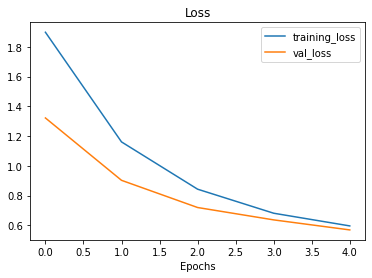

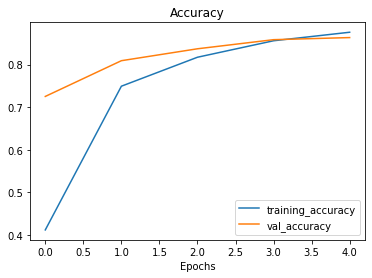

In [64]:
plot_loss_curves(history_10_percent)

In [65]:
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"2D global max pooled random tensor:\n {global_max_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global max pooled input tensor: {global_max_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)
2D global max pooled random tensor:
 [[0.9058464 1.1603122 1.6994323]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global max pooled 

In [66]:
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [67]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2021-11-24 08:19:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.253.114.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   169MB/s    in 0.8s    

2021-11-24 08:19:07 (169 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [68]:
# Walk through 1 percent data directory and list number of files
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There a

In [69]:
import tensorflow as tf
IMG_SIZE=(224,224)

train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         image_size=IMG_SIZE,
                                                                         batch_size=32,
                                                                         label_mode='categorical')

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=IMG_SIZE,
                                                              batch_size=32,
                                                              label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [70]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation=keras.Sequential([
                                    preprocessing.RandomFlip("horizontal"),
                                    preprocessing.RandomRotation(0.2),
                                    preprocessing.RandomZoom(0.2),
                                    preprocessing.RandomHeight(0.2),
                                    preprocessing.RandomWidth(0.2),
],name='data_augmentation')

(-0.5, 448.5, 569.5, -0.5)

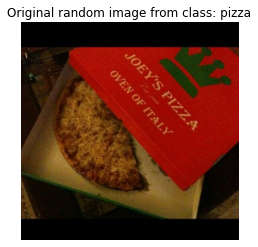

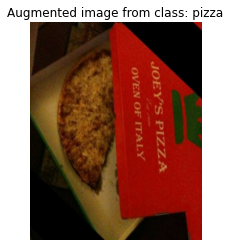

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class=random.choice(train_data_1_percent.class_names)
target_dir=train_dir_1_percent+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

augmented_img=data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f'Augmented image from class: {target_class}')
plt.axis(False)

In [72]:
input_shape=(224,224,3)

base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=input_shape,name='input_layer')
x=data_augmentation(inputs)

x=base_model(x,training=False)

x=layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs=layers.Dense(10,activation='softmax',name='output_layer')(x)

model_1=keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1_percent=model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25*len(test_data)),
                              callbacks=[create_tensorboard_callback('transfer_learning','1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20211124-081913
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


3/3 [==============================] - 13s 3s/step - loss: 2.4201 - accuracy: 0.0857 - val_loss: 2.2379 - val_accuracy: 0.1793
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1676 - accuracy: 0.2143 - val_loss: 2.1134 - val_accuracy: 0.2533
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9760 - accuracy: 0.3429 - val_loss: 2.0100 - val_accuracy: 0.3322
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.7716 - accuracy: 0.5571 - val_loss: 1.9027 - val_accuracy: 0.3931
Epoch 5/5
3/3 [==============================] - 6s 3s/step - loss: 1.6645 - accuracy: 0.6286 - val_loss: 1.8229 - val_accuracy: 0.4507


In [73]:
model_1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [74]:
model_1.evaluate(test_data)

79/79 [==============================] - 11s 130ms/step - loss: 1.7998 - accuracy: 0.4688


[1.7998497486114502, 0.46880000829696655]

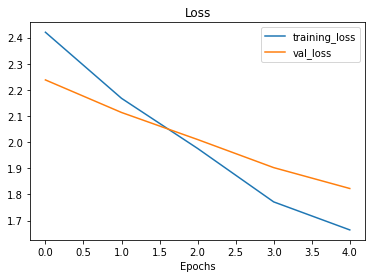

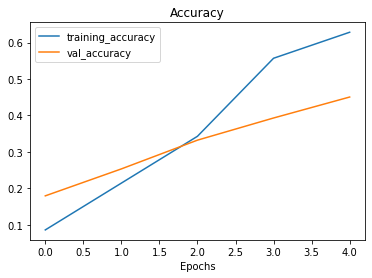

In [75]:
plot_loss_curves(history_1_percent)

In [76]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [77]:
IMG_SIZE

(224, 224)

In [84]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode='categorical')

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [85]:
data_augmentation=keras.Sequential([
                                    preprocessing.RandomFlip('horizontal'),
                                    preprocessing.RandomHeight(0.2),
                                    preprocessing.RandomWidth(0.2),
                                    preprocessing.RandomZoom(0.2),
                                    preprocessing.RandomRotation(0.2),
],name='data_augmentation')

In [86]:
input_shape=(224,224,3)

base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=input_shape,name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs=layers.Dense(10,activation='softmax',name='output_layer')(x)
model_2=keras.Model(inputs,outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [87]:
model_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [88]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [89]:
initial_epochs=5
history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                        epochs=initial_epochs,
                                        steps_per_epoch=len(train_data_10_percent),
                                        validation_data=test_data,
                                        validation_steps=int(0.25*len(test_data)),
                                        callbacks=[create_tensorboard_callback('transfer_learning','10_percent_data_aug'),
                                                   checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20211124-082438
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 1.9989 - accuracy: 0.3613
Epoch 00001: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 23s 616ms/step - loss: 1.9989 - accuracy: 0.3613 - val_loss: 1.5041 - val_accuracy: 0.6234
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3763 - accuracy: 0.6560
Epoch 00002: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 15s 598ms/step - loss: 1.3763 - accuracy: 0.6560 - val_loss: 1.0940 - val_accuracy: 0.7188
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0770 - accuracy: 0.7320
Epoch 00003: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 16s 669ms/step - loss: 1.0770 - accuracy: 0.7320 - val_loss: 0.8882 - val_accuracy: 0.7681
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9027 - accuracy: 

In [90]:
model_0.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.6000 - accuracy: 0.8424


[0.6000006198883057, 0.8424000144004822]

In [93]:
results_10_percent_data_aug=model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 11s 131ms/step - loss: 0.7115 - accuracy: 0.8132


[0.7114589214324951, 0.8131999969482422]

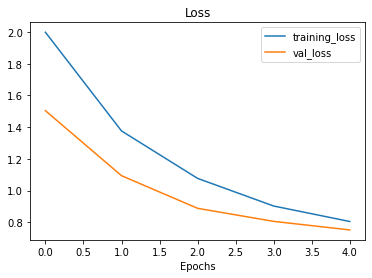

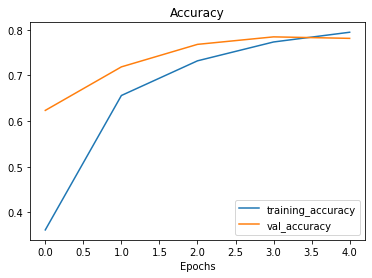

In [92]:
plot_loss_curves(history_10_percent_data_aug)

In [94]:
model_2.load_weights(checkpoint_path)

In [95]:
loaded_weights_model_results=model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.7115 - accuracy: 0.8132


In [96]:
loaded_weights_model_results==results_10_percent_data_aug

False

In [97]:
loaded_weights_model_results

[0.7114589810371399, 0.8131999969482422]

In [98]:
results_10_percent_data_aug

[0.7114589214324951, 0.8131999969482422]

In [99]:
import numpy as np
np.isclose(np.array(loaded_weights_model_results),np.array(results_10_percent_data_aug))

array([ True,  True])

In [100]:
# Check the difference between the two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[-5.96046448e-08  0.00000000e+00]


In [101]:
model_2.layers

In [103]:
for layer in model_2.layers:
  print(layer.trainable)

True
True
False
True
True


In [106]:
print(len(model_2.layers[2].trainable_variables))

0


In [108]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

model_2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=['accuracy'])

In [109]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_7 False
2 normalization_7 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [110]:
print(len(model_2.trainable_variables))

12


In [111]:
for layer in model_2.layers:
  print(layer.trainable)

True
True
True
True
True


In [112]:
fine_tune_epochs=initial_epochs+5

history_fine_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                             epochs=fine_tune_epochs,
                                             steps_per_epoch=len(train_data_10_percent),
                                             validation_data=test_data,
                                             validation_steps=int(0.25*len(test_data)),
                                             initial_epoch=history_10_percent_data_aug.epoch[-1],
                                             callbacks=[create_tensorboard_callback('transfer_learning',"10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20211124-085351
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 27s 659ms/step - loss: 0.6882 - accuracy: 0.8093 - val_loss: 0.6190 - val_accuracy: 0.7993
Epoch 6/10
24/24 [==============================] - 17s 683ms/step - loss: 0.5536 - accuracy: 0.8320 - val_loss: 0.5954 - val_accuracy: 0.7977
Epoch 7/10
24/24 [==============================] - 13s 531ms/step - loss: 0.5086 - accuracy: 0.8413 - val_loss: 0.5414 - val_accuracy: 0.8191
Epoch 8/10
24/24 [==============================] - 13s 508ms/step - loss: 0.4815 - accuracy: 0.8427 - val_loss: 0.5763 - val_accuracy: 0.8059
Epoch 9/10
24/24 [==============================] - 12s 481ms/step - loss: 0.4465 - accuracy: 0.8680 - val_loss: 0.5901 - val_accuracy: 0.7977
Epoch 10/10
24/24 [==============================] - 14s 570ms/step - loss: 0.3789 - accuracy: 0.8893 - val_loss: 0.5688 - val_accuracy: 0.8043


In [114]:
results_fine_tune_10_percent=model_2.evaluate(test_data)
results_fine_tune_10_percent

79/79 [==============================] - 11s 132ms/step - loss: 0.5107 - accuracy: 0.8340


[0.5106642842292786, 0.8339999914169312]

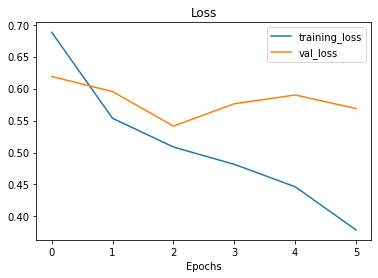

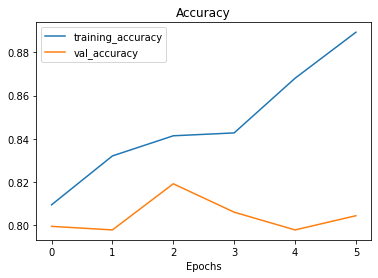

In [115]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [116]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.36133334040641785, 0.656000018119812, 0.7319999933242798, 0.7733333110809326, 0.7946666479110718, 0.809333324432373, 0.8320000171661377, 0.8413333296775818, 0.8426666855812073, 0.8679999709129333, 0.8893333077430725]


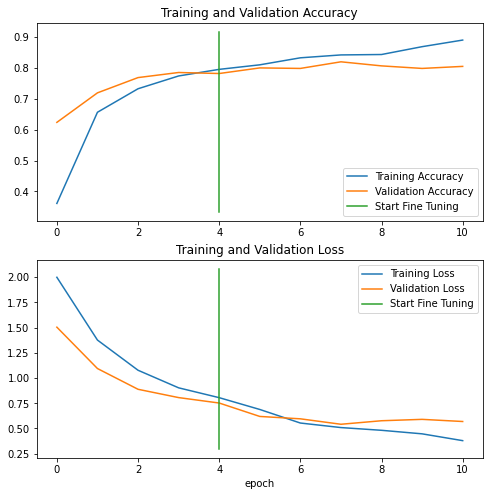

In [117]:
compare_historys(original_history=history_10_percent_data_aug, 
                 new_history=history_fine_10_percent_data_aug, 
                 initial_epochs=5)

In [118]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2021-11-24 09:16:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   185MB/s    in 2.7s    

2021-11-24 09:16:29 (185 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [119]:
IMG_SIZE

(224, 224)

In [120]:
train_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                               image_size=IMG_SIZE,
                                                                               label_mode='categorical')

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical')

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [121]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 130ms/step - loss: 0.5107 - accuracy: 0.8340


[0.5106644630432129, 0.8339999914169312]

In [122]:
results_fine_tune_10_percent

[0.5106642842292786, 0.8339999914169312]

In [123]:
model_2.load_weights(checkpoint_path)

In [124]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.7115 - accuracy: 0.8132


[0.711458683013916, 0.8131999969482422]

In [125]:
results_10_percent_data_aug

[0.7114589214324951, 0.8131999969482422]

In [126]:
# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [127]:
# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_7 False
2 normalization_7 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [128]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [129]:
fine_tune_epochs=initial_epochs+5

history_fine_10_classes_data_full=model_2.fit(train_data_10_classes_full,
                                              epochs=fine_tune_epochs,
                                              steps_per_epoch=len(train_data_10_classes_full),
                                              validation_data=test_data,
                                              validation_steps=int(0.25*len(test_data)),
                                              initial_epoch=history_10_percent_data_aug.epoch[-1],
                                              callbacks=[create_tensorboard_callback('transfer_learning','full_10_classes_fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20211124-093448
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


235/235 [==============================] - 89s 345ms/step - loss: 0.7365 - accuracy: 0.7644 - val_loss: 0.4260 - val_accuracy: 0.8487
Epoch 6/10
235/235 [==============================] - 74s 314ms/step - loss: 0.6008 - accuracy: 0.8071 - val_loss: 0.3877 - val_accuracy: 0.8734
Epoch 7/10
235/235 [==============================] - 69s 291ms/step - loss: 0.5236 - accuracy: 0.8313 - val_loss: 0.3564 - val_accuracy: 0.8750
Epoch 8/10
235/235 [==============================] - 63s 265ms/step - loss: 0.4993 - accuracy: 0.8400 - val_loss: 0.3361 - val_accuracy: 0.8898
Epoch 9/10
235/235 [==============================] - 64s 270ms/step - loss: 0.4444 - accuracy: 0.8587 - val_loss: 0.3193 - val_accuracy: 0.8947
Epoch 10/10
235/235 [==============================] - 57s 242ms/step - loss: 0.4292 - accuracy: 0.8636 - val_loss: 0.3286 - val_accuracy: 0.8997


In [130]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 11s 130ms/step - loss: 0.3142 - accuracy: 0.8992


[0.31424590945243835, 0.8992000222206116]

5
11
[0.36133334040641785, 0.656000018119812, 0.7319999933242798, 0.7733333110809326, 0.7946666479110718, 0.7644000053405762, 0.8070666790008545, 0.831333339214325, 0.8399999737739563, 0.8586666584014893, 0.8636000156402588]


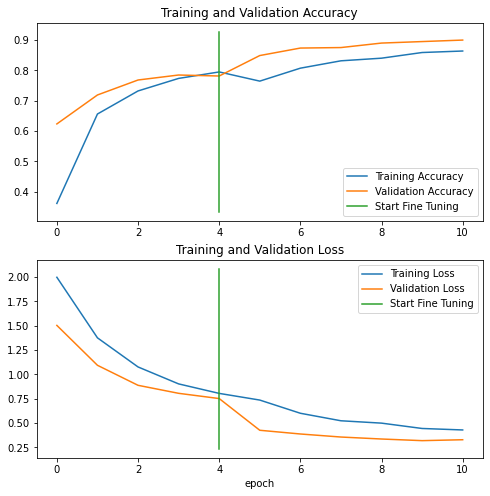

In [132]:
# How did fine-tuning go with more data?
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_data_full,
                 initial_epochs=5)

In [ ]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot # exits the uploader when upload has finished

In [134]:
# View previous experiments
!tensorboard dev list

https://tensorboard.dev/experiment/bMKaV1TzRV6jmSN73N0k9w/
	Name                 Transfer learning experiments
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning
	Id                   bMKaV1TzRV6jmSN73N0k9w
	Created              2021-11-24 09:46:40 (4 minutes ago)
	Updated              2021-11-24 09:46:48 (3 minutes ago)
	Runs                 18
	Tags                 5
	Scalars              258
	Tensor bytes         0
	Binary object bytes  7450047
https://tensorboard.dev/experiment/QZ59uQEJRnCYKGTzpGLvKg/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction models architectures using 10% of training images
	Id                   QZ59uQEJRnCYKGTzpGLvKg
	Created              2021-11-23 10:28:16 (23 hours ago)
	Updated              2021-11-23 10:28:18 (23 hours ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes  